# DAKAR AIR POLLUTION

### 1.0 DESCRIPTION 

The goal of this project is to predict air quality in Dakar, Senegal based on ground sensor data that records PM2.5 pollution and historical weather data.

### 1.1 Problem

This problem is a supervised regression machine learning task. The objective is to use historical waether data and PM2.5 sensor data to predict the air quality in Dakar Senegal. This is a standard supervised regression task:

* __Supervised__: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
* __Regression__: The label is a positive continuous variable

### 1.2 Description of the data

There are two datasets used here namely:
- PM2.5 Dakar 2010-2019
- GOSS (Historical Weather data)

#### PM2.5 Dakar 2010-2019

An excel file containing 10 worksheets of PM2.5 pollution readings from 2010 to 2019

#### GOSS (Historical Weather data)

Historical weather data from August 2011 to November 2019

- station:three or four character site identifier
- valid:timestamp of the observation
- tmpf:Air Temperature in Fahrenheit, typically @ 2 meters
- dwpf:Dew Point Temperature in Fahrenheit, typically @ 2 meters
- relh:Relative Humidity in %
- drct:Wind Direction in degrees from north
- sknt:Wind Speed in knots
- p01i:One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. This varies slightly by site. Values are in inches. This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means. Unfortunately, we do not know of an authoritative database denoting which station has which sensor.
- alti:Pressure altimeter in inches
- mslp:Sea Level Pressure in millibar
- vsby:Visibility in miles
- gust:Wind Gust in knots
- skyc1:Sky Level 1 Coverage
- skc2:Sky Level 2 Coverage
- skyc3:Sky Level 3 Coverage
- skyc4:Sky Level 4 Coverage
- skyl1:Sky Level 1 Altitude in feet
- skyl2:Sky Level 2 Altitude in feet
- skyl3:Sky Level 3 Altitude in feet
- skyl4:Sky Level 4 Altitude in feet
- wxcodes:Present Weather Codes (space seperated)
- feel:Apparent Temperature (Wind Chill or Heat Index) in Fahrenheit
- ice_accretion_1hr:Ice Accretion over 1 Hour (inches)
- ice_accretion_3hr:Ice Accretion over 3 Hours (inches)
- ice_accretion_6hr:Ice Accretion over 6 Hours (inches)
- peak_wind_gust:Peak Wind Gust (from PK WND METAR remark) (knots)
- peak_wind_drct:Peak Wind Gust Direction (from PK WND METAR remark) (deg)
- peak_wind_time:Peak Wind Gust Time (from PK WND METAR remark)
- metar:unprocessed reported observation in METAR format


### Setting up the environment

Importing relevant libraries

In [84]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

### 2.0 Loading the data

In [2]:
#loading all the 10 worksheets of the file into different dataframes
data10= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=0)
data11= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=1)
data12= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=2)
data13= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=3)
data14= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=4)
data15= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=5)
data16= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=6)
data17= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=7)
data18= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=8)
data19= pd.read_excel('PM2,5_Dakar_2010_2019_OK.xlsx', sheet_name=9)

In [3]:
#created a list of the dataframes
data_list = [data10,data11,data12,data13,data14,data15,data16,data17,data18,data19]

### 2.1 Exploring the data

In [4]:
#looped through the list of dataframes and printed out the info for each dataframe
year= 2010
for data in data_list:
    print('-----------------------------------------------------')
    print(year)
    print(data.info())
    year+=1

-----------------------------------------------------
2010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
Date        368 non-null object
Bel Air     315 non-null float64
Bd. Rép.    277 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.8+ KB
None
-----------------------------------------------------
2011
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
Date             368 non-null object
Bel Air          331 non-null float64
Bd République    350 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.8+ KB
None
-----------------------------------------------------
2012
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
Date       369 non-null object
Bel Air    319 non-null float64
Bd Rép     263 non-null float64
dtypes: float64(2), object(1)
memory usage: 8.8+ KB
None
----------------------------------

In [5]:
#looped through the list of dataframes and printed out the descriptive statistics for each dataframe
year= 2010
for data in data_list:
    print('-----------------------------------------------------')
    print(year)
    print(data.describe())
    year+=1

-----------------------------------------------------
2010
          Bel Air    Bd. Rép.
count  315.000000  277.000000
mean    39.528461   41.648454
std     36.172203   35.203499
min      7.300000    3.636364
25%     22.435960   24.958330
50%     30.620830   33.318180
75%     40.633330   44.043480
max    312.000000  275.000000
-----------------------------------------------------
2011
          Bel Air  Bd République
count  331.000000     350.000000
mean    38.723704      34.478171
std     29.894445      28.897368
min      0.000000       4.000000
25%     22.281250      18.074277
50%     32.600000      27.510870
75%     46.863045      41.885420
max    328.000000     348.000000
-----------------------------------------------------
2012
          Bel Air      Bd Rép
count  319.000000  263.000000
mean    45.464249   43.525625
std     54.082599   46.948610
min      4.754167    2.133333
25%     17.838480   17.791665
50%     27.665000   28.041670
75%     54.285415   48.729165
max    489.38330

### 2.2 Checking for missing data

Checking for missing data in the yearly PM2.5 data

In [6]:
#looped through the list of dataframes and printed out the percentage of missing values for each dataframe
year= 2010
for data in data_list:
    print('-----------------------------------------------------')
    print(year)
    print((data.isnull().sum())/data.shape[0])
    year+=1

-----------------------------------------------------
2010
Date        0.002710
Bel Air     0.146341
Bd. Rép.    0.249322
dtype: float64
-----------------------------------------------------
2011
Date             0.002710
Bel Air          0.102981
Bd République    0.051491
dtype: float64
-----------------------------------------------------
2012
Date       0.002703
Bel Air    0.137838
Bd Rép     0.289189
dtype: float64
-----------------------------------------------------
2013
Date       0.002710
Bel Air    0.376694
Bd Rép     0.173442
dtype: float64
-----------------------------------------------------
2014
Date      0.002710
Bd Rép    0.203252
dtype: float64
-----------------------------------------------------
2015
Date        0.002710
Bel Air     0.479675
Bd. Rép.    0.463415
dtype: float64
-----------------------------------------------------
2016
Date       0.002703
Bel Air    0.400000
dtype: float64
-----------------------------------------------------
2017
Date        0.002710


In [7]:
data10.head()

,Date,Bel Air,Bd. Rép.
0,2010-01-01 00:00:00,39.45417,51.20833
1,2010-01-02 00:00:00,46.53334,49.66667
2,2010-01-03 00:00:00,37.02917,44.08333
3,2010-01-04 00:00:00,48.43750,49.04167
4,2010-01-05 00:00:00,39.79167,40.58333


### 2.3 Partial filling of missing data

I attempted to narrow down on the missing data by finding the average of the various stations for each data to cover up for the missing values

In [8]:
#looped through the list of dataframes calculated the average across each row in each dataframe
for data in data_list:
    data['Avg']=data.mean(axis=1)

In [9]:
#creating a new list of dataframes containing the Date and Avg as the columns
new_data = [data[['Date','Avg']] for data in data_list]

In [10]:
#looped through the list of dataframes and checked the percentage of missing values for each dataframe
year= 2010
for data in new_data:
    print('-----------------------------------------------------')
    print(year)
    print((data.isnull().sum())/data.shape[0])
    year+=1

-----------------------------------------------------
2010
Date    0.002710
Avg     0.092141
dtype: float64
-----------------------------------------------------
2011
Date    0.00271
Avg     0.00813
dtype: float64
-----------------------------------------------------
2012
Date    0.002703
Avg     0.051351
dtype: float64
-----------------------------------------------------
2013
Date    0.002710
Avg     0.146341
dtype: float64
-----------------------------------------------------
2014
Date    0.002710
Avg     0.203252
dtype: float64
-----------------------------------------------------
2015
Date    0.002710
Avg     0.401084
dtype: float64
-----------------------------------------------------
2016
Date    0.002703
Avg     0.400000
dtype: float64
-----------------------------------------------------
2017
Date    0.002710
Avg     0.663957
dtype: float64
-----------------------------------------------------
2018
Date    0.002710
Avg     0.249322
dtype: float64
------------------------------

In [11]:
#looped through the list of dataframes and printed out the descriptive statistics for each dataframe
year= 2010
for data in new_data:
    print('-----------------------------------------------------')
    print(year)
    print(data.describe())
    year+=1

-----------------------------------------------------
2010
              Avg
count  335.000000
mean    38.849239
std     33.952282
min      3.636364
25%     23.522462
50%     30.850000
75%     40.222918
max    293.500000
-----------------------------------------------------
2011
              Avg
count  366.000000
mean    36.105559
std     28.514244
min      3.702381
25%     19.807812
50%     29.755662
75%     43.579167
max    338.000000
-----------------------------------------------------
2012
              Avg
count  351.000000
mean    42.381152
std     46.417888
min      5.080000
25%     17.939300
50%     27.665000
75%     49.908575
max    384.822100
-----------------------------------------------------
2013
              Avg
count  315.000000
mean    34.219813
std     33.580553
min      0.625000
25%     17.304195
50%     24.499640
75%     34.156345
max    265.000000
-----------------------------------------------------
2014
              Avg
count  294.000000
mean    28.804816
std

In [12]:
# sliced the last 4 rows of each of the dataframes
new_data = [data[:-4] for data in new_data]

In [13]:
#combine the dataframes into one dataframe
pm_data = pd.concat(new_data, ignore_index=True)

In [14]:
#checking for the percentage of missing values
pm_data.isnull().sum()/pm_data.shape[0]

Date    0.000000
Avg     0.239562
dtype: float64

In [15]:
#view the top 5 rows
pm_data.head()

,Date,Avg
0,2010-01-01 00:00:00,45.331250
1,2010-01-02 00:00:00,48.100005
2,2010-01-03 00:00:00,40.556250
3,2010-01-04 00:00:00,48.739585
4,2010-01-05 00:00:00,40.187500


In [16]:
#converting the Date column to datetime
pm_data['Date'] = pd.to_datetime(pm_data.Date) 

### 3.0 Loading the 2nd dataset

In [17]:
#loading the weather data
weather = pd.read_csv('GOSS.txt', sep=',', parse_dates=['valid'], index_col='valid')

### 3.1 Exploring the 2nd dataset

This includes
- Looking at the top rows
- Data types
- Missing values
- Dropping missing values

In [19]:
weather.head()

,station,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
valid,,,,,,,,,,,,,,,,,,,,,
2011-08-22 19:30:00,GOOY,80.6,75.2,83.66,320.0,6.0,NaN,29.74,NaN,6.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.17,GOOY 221930Z 32006KT 270V350 9999 BKN013 SCT13...
2011-08-22 20:00:00,GOOY,80.6,75.2,83.66,330.0,6.0,NaN,29.74,NaN,6.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.17,GOOY 222000Z 33006KT 9999 BKN013 SCT130 27/24 ...
2011-08-22 20:30:00,GOOY,80.6,75.2,83.66,330.0,5.0,NaN,29.74,NaN,6.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.17,GOOY 222030Z 33005KT 9999 SCT013 SCT130 27/24 ...
2011-08-22 21:00:00,GOOY,80.6,75.2,83.66,320.0,4.0,NaN,29.74,NaN,6.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.17,GOOY 222100Z 32004KT 9999 SCT013 SCT130 27/24 ...
2011-08-22 21:30:00,GOOY,80.6,75.2,83.66,0.0,3.0,NaN,29.77,NaN,6.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.17,GOOY 222130Z VRB03KT 9999 FEW013 BKN230 27/24 ...


In [20]:
#checking the datatypes
weather.dtypes

station               object
tmpf                 float64
dwpf                 float64
relh                 float64
drct                 float64
sknt                 float64
p01i                 float64
alti                 float64
mslp                 float64
vsby                 float64
gust                 float64
skyc1                 object
skyc2                 object
skyc3                 object
skyc4                 object
skyl1                float64
skyl2                float64
skyl3                float64
skyl4                float64
wxcodes               object
ice_accretion_1hr    float64
ice_accretion_3hr    float64
ice_accretion_6hr    float64
peak_wind_gust       float64
peak_wind_drct       float64
peak_wind_time       float64
feel                 float64
metar                 object
dtype: object

In [21]:
#checking for the percentage of missing values
weather.isnull().sum()/weather.shape[0]

station              0.000000
tmpf                 0.001628
dwpf                 0.001728
relh                 0.002592
drct                 0.033530
sknt                 0.001338
p01i                 0.100148
alti                 0.001575
mslp                 1.000000
vsby                 0.001269
gust                 0.974848
skyc1                0.358085
skyc2                0.785432
skyc3                0.869648
skyc4                0.894532
skyl1                0.584885
skyl2                0.878003
skyl3                0.970338
skyl4                0.997814
wxcodes              0.942060
ice_accretion_1hr    1.000000
ice_accretion_3hr    1.000000
ice_accretion_6hr    1.000000
peak_wind_gust       1.000000
peak_wind_drct       1.000000
peak_wind_time       1.000000
feel                 0.008149
metar                0.000000
dtype: float64

In [23]:
#creating a list of columns to be maintained in the dataframe
cols = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt',
       'alti', 'vsby', 'feel']

In [24]:
# overwriting the weather dataframe, keeping the specified colums
weather = weather[cols]

In [25]:
# veiwing the bottom 5 columns
weather.tail()

,tmpf,dwpf,relh,drct,sknt,alti,vsby,feel
valid,,,,,,,,
2019-11-27 18:00:00,75.2,69.8,83.32,360.0,16.0,29.85,6.21,NaN
2019-11-27 19:00:00,73.4,69.8,88.51,360.0,12.0,29.88,6.21,NaN
2019-11-27 21:00:00,73.4,69.8,88.51,360.0,14.0,29.91,4.97,NaN
2019-11-27 22:00:00,73.4,69.8,88.51,360.0,14.0,29.91,4.97,NaN
2019-11-27 23:00:00,73.4,69.8,88.51,360.0,12.0,29.91,4.97,NaN


### 3.2 Resampling the data

This dataset contained multiple records at differnt hours of the day. Here I resampled the day at a daily frequency

In [26]:
# resampling on a daily frequency
weather = weather.resample('d').mean()

In [27]:
#checking the dimensions of the weather dataframe
weather.shape

(3020, 8)

### 4.0 Merging the datasets

Performed an outer merge on the PM2.5 pollution data and the weather data

In [29]:
#Merging the 2 dataframes
data = pd.merge(pm_data, weather, how='outer', left_on='Date', right_on='valid',suffixes=('','_weather'))

### 4.1 Handling missing values

In [30]:
#looped through the columns and forward filled the missing values
cols = data.columns
for col in cols:
    data[col] = data[col].fillna(method='ffill')

In [83]:
data.isnull().sum()/data.shape[0]

Date     0.0
Avg      0.0
tmpf     0.0
dwpf     0.0
relh     0.0
drct     0.0
sknt     0.0
alti     0.0
vsby     0.0
feel     0.0
year     0.0
month    0.0
day      0.0
dtype: float64

In [235]:
'''cols = data.columns
for col in cols:
    data[col] = data[col].fillna(data[col].mean())'''

In [32]:
data.head()

,Date,Avg,tmpf,dwpf,relh,drct,sknt,alti,vsby,feel
0,2010-01-01,45.331250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,48.100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,40.556250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,48.739585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-05,40.187500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#dropped all rows that contain missing values
data.dropna(inplace=True)

In [101]:
data.head()

,Date,Avg,tmpf,dwpf,relh,drct,sknt,alti,vsby,feel,year,month,day
598,2011-08-22,20.572025,80.600000,75.200000,83.660000,250.000000,4.666667,29.763333,6.210000,86.170000,2011,8,22
599,2011-08-23,13.958150,81.270588,75.411765,82.781961,122.941176,11.588235,29.798431,5.942549,87.272549,2011,8,23
600,2011-08-24,9.764131,82.603774,75.743396,80.028519,156.545455,6.849057,29.892453,2.271455,90.058704,2011,8,24
601,2011-08-25,12.677749,79.512500,75.350000,87.215833,154.230769,3.875000,29.954375,-2.246923,84.032083,2011,8,25
602,2011-08-26,16.391300,79.683019,76.388679,89.905283,192.264151,4.547170,29.924717,5.794528,84.709434,2011,8,26


### 4.2 Creating new features

Generation of the year, month, and day features from the date feature

In [34]:
#extraction of the year, month and day from the Date column
data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

### 5.0 Data Visualization

This showed some aspect of seasonality in the PM2.5 levels.
It also showed that at higher temperatures and humidity, there are lower levels of pollution

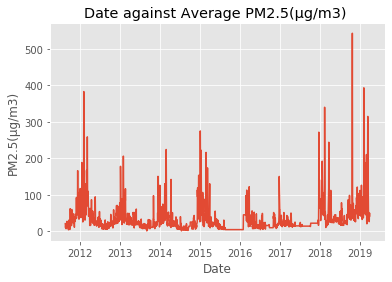

In [97]:
# creation of a line plot
plt.title('Date against Average PM2.5(μg/m3) ')
plt.xlabel("Date")
plt.ylabel("PM2.5(μg/m3)")
plt.plot(data['Date'],data['Avg'])

In [37]:
#grouped the data by the month column
avg_by_month = data.groupby('month')['Avg','tmpf','dwpf','relh'].mean()
avg_by_month.head()

,Avg,tmpf,dwpf,relh
month,,,,
1,54.319417,71.526006,56.733916,63.104982
2,62.181158,69.338911,57.371975,68.971250
3,46.067102,76.325978,67.625493,76.481527
4,31.158956,70.697180,63.702545,79.880108
5,27.310488,73.640751,67.224676,81.013874


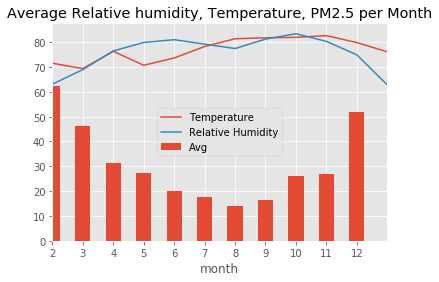

In [99]:
plt.title('Average Relative humidity, Temperature, PM2.5 per Month')
avg_by_month['Avg'].plot(kind='bar')
avg_by_month['tmpf'].plot(label='Temperature')
avg_by_month['relh'].plot(label='Relative Humidity')
plt.legend()

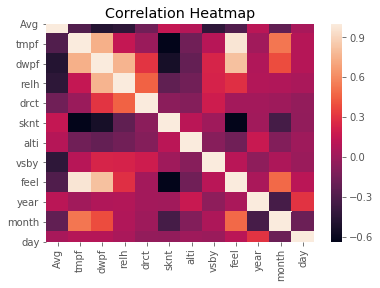

In [100]:
#creation of a correlation heatmap
plt.title('Correlation Heatmap')
sns.heatmap(data.corr())

### 6.0 Separation of features and targets

In [94]:
#separating the features and target to be used in modelling
target = data['Avg']
features = data.drop(['Avg','Date'],axis=1)

### 7.0 Modelling

Used 3 regression models, namely:
- XGBRegressor
- RandomForestRegressor
- LinearRegression


To avoid overfitting, KFold cross validation with 5 splits was used

In [89]:
kf = KFold(shuffle=True, n_splits=5) #created a 5-fold cross validation

#instanciated the random forest,linear and XGB regressors
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror')
rf_model = RandomForestRegressor()
linear_model=LinearRegression()

In [90]:
# use of cross validation in XGB to ensure the model does not overfit
scores= cross_val_score(xgb_model, features, target, cv=kf, scoring='neg_mean_absolute_error')
print(scores)

[-10.14000294 -10.18358484 -10.17883755 -10.76684479  -9.88854917]


In [91]:
# use of cross validation in RandomForest to ensure the model does not overfit
scores= cross_val_score(rf_model, features, target, cv=kf, scoring='neg_mean_absolute_error')
print(scores)

[ -9.85066059  -8.00027545 -10.53341173  -9.54486113  -9.35050426]


In [92]:
# use of cross validation in linear regression to ensure the model does not overfit
scores= cross_val_score(linear_model, features, target, cv=10, scoring='neg_mean_absolute_error')
print(scores)

[-26.46858496 -12.87096047 -11.99590482 -16.92327857 -19.01869753
 -11.51313063 -18.18151873 -20.13209812 -27.4039555  -12.43483854]


### 7.1 Optimization of Random forest and XGB Regressors

Used GridSearchCV to get the best combination of parameters

In [54]:
#creation of a parameter grid
param_grid={'learning_rate': [0.01,0.1], 'max_depth' : [3,5], 'alpha' : [3], 
            'n_estimators' : [300,500,700,900], 'subsample' : [0.2,0.5,0.7]}

#instanciation of the GridSearchCV object
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_absolute_error', cv=kf, error_score='raise-deprecating',
                        n_jobs=-1)

In [55]:
#fitting the data
xgb_grid.fit(features, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthr...
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [3], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5],
             

In [56]:
#getting the best parameters for the model
xgb_grid.best_params_

{'alpha': 3,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 900,
 'subsample': 0.7}

In [61]:
#getting the best score for the model
xgb_grid.best_score_

-9.079750251176128

In [93]:
xgb_regressor = xgb.XGBRegressor(alpha = 3, learning_rate = 0.01,max_depth=5, n_estimators=1000, subsample=0.7)

scores= cross_val_score(xgb_regressor, features, target, cv=kf, scoring='neg_mean_absolute_error')
print(scores)

[21:30:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-10.33608685  -8.5984514   -9.15366781  -8.4111379   -9.04706089]


In [62]:
param_grid={'max_depth': [None,3,5], 'max_features' : [3,5],'n_estimators' : [100,500,700,900]}
rf_grid = GridSearchCV(rf_model, param_grid, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

In [63]:
rf_grid.fit(features, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,


In [64]:
rf_grid.best_params_

{'max_depth': None, 'max_features': 5, 'n_estimators': 900}

In [65]:
rf_grid.best_score_

-8.797766742195547

In [80]:
rf_regressor = RandomForestRegressor(max_features=5, n_estimators=1000)

scores= cross_val_score(rf_regressor, features, target, cv=kf, scoring='neg_mean_absolute_error')
print(scores)

[-9.28561111 -9.13521117 -8.81797801 -8.81141148 -8.5402812 ]


### 8.0 Conclusion

The RandomForestRegressor edged out the XGBRegressor having a mean absolute error of 8.798